<a href="https://colab.research.google.com/github/sashavlasits/Data-Science/blob/main/Unit6/SMV_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

In [1]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.9/218.9 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 15.3 MB/s eta 0:00:00


In [3]:
import bambi as bmb

**Task1**:

Does elpd_loo mean anything if we only have one model?

No! It is a way to compare models to see which one is better, so if you have nothing to compare your model to, it's pretty darn useless.

**Task2**:

Describe overfitting, in the context of this course

Basically, overfitting is an over emphasis on curve matching in your model making. If you spend too much time optimizing your model to perfectly fit the weird little nuances of your dataset that almost certainly don't reflect the true population, then your model will suffer. When it tries to predict things about the larger population, it will fall into the trap of reflecting this weird nuance, thereby creating results that are flawed.

**Task3**:

How do we mitigate overfitting?

Not using too strong of priors! Strong priors can do a lot in forcing the model to fit the curve, but this can be bad! Thus, we just want to use somewhat informative priors that will give us the general shape of thee data, but won't influence it adversely by over-shaping the results. As per the notes, these are called regularizing priors and the priors that bambi generates automatically are good examples of this. So as a short answer: just use bambi.  

**Task4**:

How do we mitigate underfitting?

We get better at doing the data science! We just need to figure out how to make more complex models that actually have the capability to make the level of speceficity of models that we require for our data.

**Task5**:

Why would we want more than one predictor in a model?

Because real world things almost always have more than one significant predictor. Like, that's just how stuff works. Our world is so complicated that any sort of variable has a lot of stuff going on with it. Like with the bikes, once you start looking you realize that lots of things not even included in the data set could have an effect. Amount of bike lanes in the city, for example. If we ignore factors like this, we lose nuance and can ignore very important effects of these predictors.

**Task6**:

Can we have too many predictors? How would we know?

Because sometime the predictors don't actaully predict. And if they don't actually have a substantive effect on making the model better, they will likely just serve to distort the model and make it worse. We would know that we have too many if we take some of them away and they actaully do better due to the lack of distortion from bad predictors.


**Task7**:

What is variable selection, and how does it work?

Variable selection is when we decide which predictors ought to be included in our model based on whether they actually predict well or not. We do this basically by starting with all of the variables, and whittling the model down by removing successive variables and gauging their effect on the fit by their absence. Then you just take the lowest common denominator of the model with the fewest variables that still performs effectively. Get elpd loo to compare and bob's your uncle.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

In [ ]:
#define the model
model_basketball = bmb.Model("`FG%` ~ `FT%` + Pos", data=basketball)
#fit the model
idata_basketball = model_basketball.fit(idata_kwargs={'log_likelihood': True})

In [ ]:
#define the model, but as a hierarchy
model_basketball_h = bmb.Model("`FG%` ~ (`FT%`|Pos)", data=basketball)
#create the model
idata_basketball_h = model_basketball_h.fit(idata_kwargs={'log_likelihood': True})

In [ ]:
#define the model; bb_interq stands for baskeball interaction quantiative
model_bb_interq = bmb.Model("`FG%` ~ `FT%` + `3PA` + `FT%`:`3PA`", data=basketball)
#create the model
idata_bb_interq = model_bb_interq.fit(idata_kwargs={'log_likelihood': True})

Well, all of them have the  same basic bambi structure but they have different notation for including the different variables. The first one just has all of the variables listed, with the categorical varible added in with different notation to differentiate it. The second shores up the connection between FT and pos, reflecting the heirarchical nature of the model. The third replaces pos with 3PA, naturally. I don't entirely understand the exact syntax of bambi to know what the different symbols are doing, but they clearly have some effect. Other than that, the models are just about identical.

Okay, apparently I was not just supposed to talk about the syntax of the code, so here is my adendum:

Just including the variables, as in the first model basically just means that your proposing that FT and pos have some causal relationship with FG, and thus can be used to try and predict FG.

Adding in the heirarchical element acknowledges the fact that position has a relationship to FT as well as FG, and thus shoud be used in connection with FT, as well as as a direct predictor of FG.

With the categorical interaction introduces the double arrow in the causal diagram. This model goes on to account for the fact that FT affects position AND position affects FT. It also retains the basic structure of both variables directly affecting FG.


**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

We totally can visualize multiple models at once. This is even quite easy, up to about four variables, because anything past four dimensions is just crazy. Thus, we have to split it up into a bunch of graphs after that so we can sort of see how they are different.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [4]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'
    ).dropna()

In [5]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [13]:
#define the model
model_basketball1 = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb)
#fit the model
idata_basketball1 = model_basketball1.fit(idata_kwargs={'log_likelihood': True})

Output()

In [8]:
#define the model, but as a hierarchy
model_basketball2 = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb)
#create the model
idata_basketball2 = model_basketball2.fit(idata_kwargs={'log_likelihood': True})

Output()

ERROR:pymc.stats.convergence:There were 9 divergences after tuning. Increase `target_accept` or reparameterize.


In [9]:
#gemememiii helped me with the syntax
model_basketball3 = bmb.Model("`FGp` ~ `FTp` * Pos", data=bb)
#fit the model
idata_basketball3 = model_basketball3.fit(idata_kwargs={'log_likelihood': True})

Output()

In [10]:
#gemememiii helped me with the syntax
model_basketball4 = bmb.Model("'FGp' ~ 'FTp' * 'Pos' + 'FTp' * '3PA' + 'Pos' * '3PA'", data=bb)
#fit the model
idata_basketball4 = model_basketball4.fit(idata_kwargs={'log_likelihood': True})

Output()

In [11]:
#gemememiii helped me with the syntax
model_basketball5 = bmb.Model("'FGp' ~ 'FTp' + 'Pos' * '3PA'", data=bb)
#fit the model
idata_basketball5 = model_basketball5.fit(idata_kwargs={'log_likelihood': True})

Output()

In [14]:
cmp_df = az.compare( {"1":idata_basketball1,"2":idata_basketball2, "3":idata_basketball3, "4":idata_basketball4, "5":idata_basketball5} )

cmp_df

/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
5,0,529.934506,12.626884,0.000000,5.917143e-01,15.786469,0.000000,False,log
4,1,528.954654,19.087662,0.979852,4.082857e-01,14.899776,3.624969,False,log
3,2,509.122812,13.986789,20.811694,9.469572e-14,16.762117,7.564888,True,log
2,3,507.955430,14.041856,21.979076,3.470595e-14,16.995573,7.045076,False,log
1,4,506.832468,8.902376,23.102038,0.000000e+00,16.169759,6.788317,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

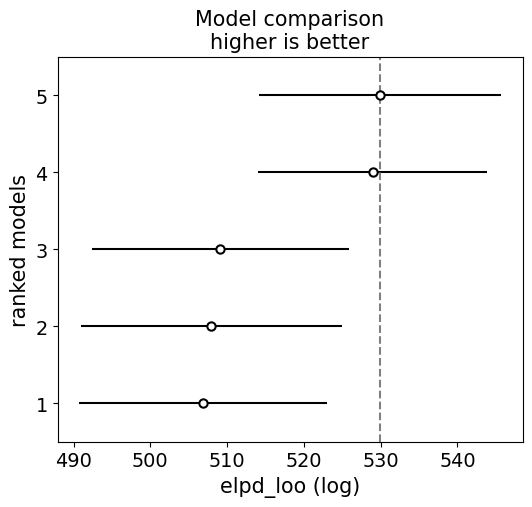

In [18]:
az.plot_compare(cmp_df)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

Well, it appears that models four and five are quite similar to each other in their general goodness. They have almost identical standard errors and both have quite positive elpd-loos. The other three are in their own cluster, but they still have similar standard errors to the other ones, but with less posititive elpd-loos, so they are worse.

Overall, model five wins just barely due to its high elpd-loo. This does makes sense in the context of basketball, as postion and three point attempts should be related. Some posititons prioritize making certain kinds of shots as part of their baskteball duities. Thus, this model would provide nuance without adding in interactions between the other variables that have less strong connections and might lead to overfitting.   


**Task12:**

The body data set has a measure of body fat percentage (siri), as well as several other measurments of other parts of a person's body, plus their age.

Create a sensible causal diagram for this set of variables.

Based on your causal diagram, which variable should you try to predict? Why?

In [19]:
body = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/body_fat.csv')

In [20]:
body.head()

,siri,age,weight,height,abdomen,thigh,wrist
0,12.3,23,70.1,172,85.2,59.0,17.1
1,6.1,22,78.8,184,83.0,58.7,18.2
2,25.3,22,70.0,168,87.9,59.6,16.6
3,10.4,26,84.0,184,86.4,60.1,18.2
4,28.7,24,83.8,181,100.0,63.2,17.7


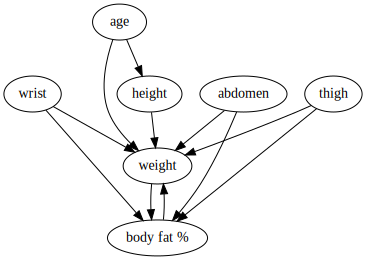

In [32]:
dag_z = gv.Digraph(comment='bikes_dag') #b for bikes

dag_z.node('R', 'weight')
dag_z.node('H', 'age')
dag_z.node('Z', 'wrist')
dag_z.node('W', 'body fat %')
dag_z.node('Y', 'abdomen')
dag_z.node('T','height')
dag_z.node('P','thigh')

dag_z.edges(['TR','HR','ZW','WR','YR','HT','ZR','RW','YW','PW','PR'])


dag_z

Based on this horrible mess of arrows and such that shows the complex relationship between various human body characteristics, I would likely try to predict body fat, although weight would also be possible. This is because the general path of the arrows (and thus the causality) runs towards these variables. Most of the other nodes are either causing them, or causing things that cause them.